## Libraries


In [4]:
import pandas as pd  
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization

## Load Dataset



In [8]:

import pandas as pd

# Load the dataset
data = pd.read_csv('fraudTrain.csv')

In [9]:
# Load the dataset
data = pd.read_csv('fraudTrain.csv')

# Inspect the first few rows
print(data.head())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

### Check the data types and non-null counts



In [10]:
print(data.info())

# Summary statistics for numerical columns
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# Check for missing values



In [11]:
print(data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


## Check for Duplicate Records

In [12]:
# Check for duplicate rows
print(data.duplicated().sum())


0


In [13]:
# List column names
print(data.columns)


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


##  Drop Unnecessary Columns

In [14]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num', 'dob']
data_cleaned = data.drop(columns=columns_to_drop)


## Handle Missing Values

In [15]:
# Example: Drop rows with missing values
data_cleaned = data_cleaned.dropna()

# Example: Fill missing values with the median of the column (for numerical data)
data_cleaned['amt'] = data_cleaned['amt'].fillna(data_cleaned['amt'].median())

# Example: Fill missing values with the mode of the column (for categorical data)
data_cleaned['category'] = data_cleaned['category'].fillna(data_cleaned['category'].mode()[0])


## Convert Data Types

In [16]:
# Convert 'trans_date_trans_time' to datetime format
data_cleaned['trans_date_trans_time'] = pd.to_datetime(data_cleaned['trans_date_trans_time'])


## Feature Engineering

In [17]:
# Extract additional features from 'trans_date_trans_time'
data_cleaned['hour'] = data_cleaned['trans_date_trans_time'].dt.hour
data_cleaned['day_of_week'] = data_cleaned['trans_date_trans_time'].dt.dayofweek


## Remove Duplicates

In [18]:
# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()


## Normalize

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize numerical columns
numerical_columns = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop']
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])


## Exploratory Data Analysis (EDA)

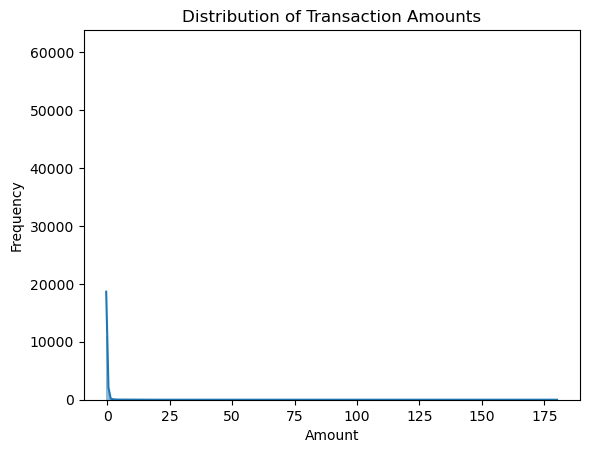

In [20]:
sns.histplot(data_cleaned['amt'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


## Fradulanent

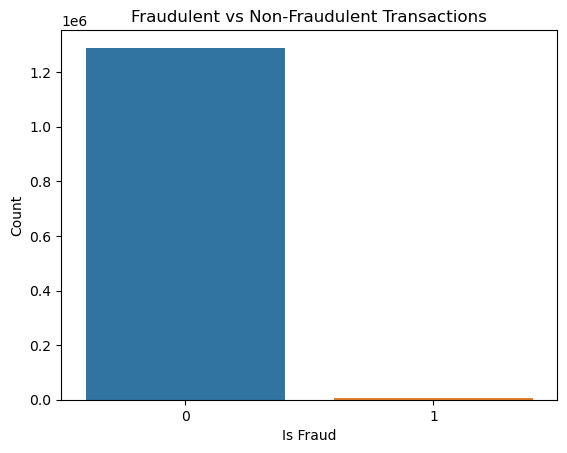

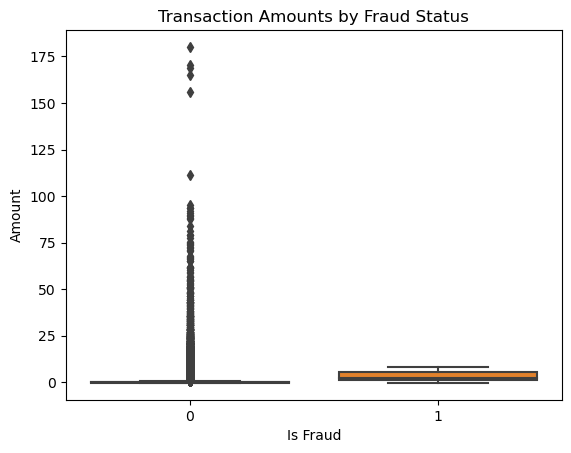

In [21]:
# Count of fraudulent vs non-fraudulent transactions
sns.countplot(x='is_fraud', data=data_cleaned)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

# Distribution of amounts for fraudulent and non-fraudulent transactions
sns.boxplot(x='is_fraud', y='amt', data=data_cleaned)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()


# Transactions by hour






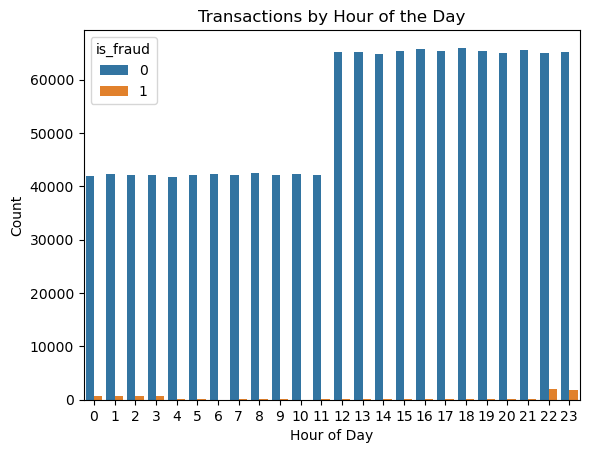

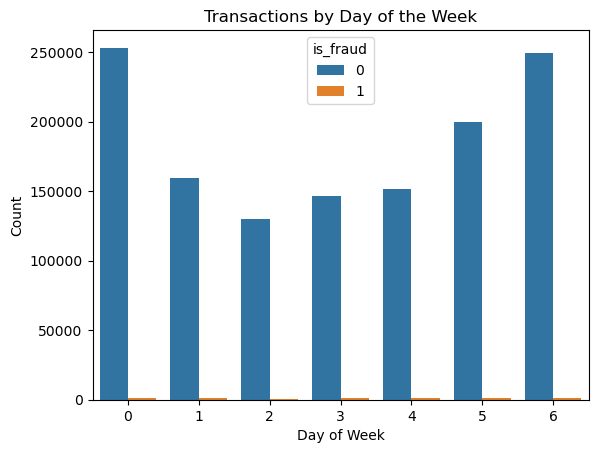

In [22]:
sns.countplot(x='hour', data=data_cleaned, hue='is_fraud')
plt.title('Transactions by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

# Transactions by day of the week
sns.countplot(x='day_of_week', data=data_cleaned, hue='is_fraud')
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

C:\Users\Moulya\AppData\Local\Temp\ipykernel_9072\3436450309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned.corr()


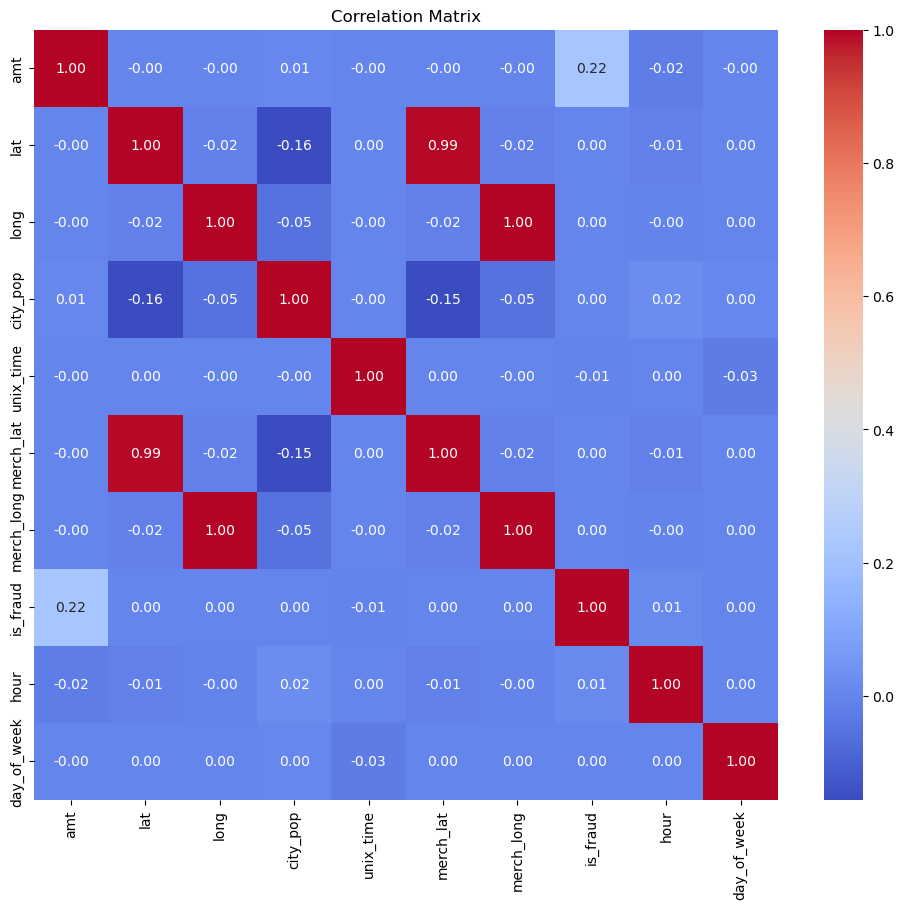

In [23]:
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Step 4: Data Preprocessing

In [24]:
# Example of selecting features
features = ['amt', 'hour', 'day_of_week', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop']
X = data_cleaned[features]
y = data_cleaned['is_fraud']


In [25]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


 ## Split Data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize and train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87    386334
           1       0.94      0.76      0.84    387168

    accuracy                           0.85    773502
   macro avg       0.87      0.85      0.85    773502
weighted avg       0.87      0.85      0.85    773502

ROC AUC Score: 0.8542181850161897


## Random Forest

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Load the data
df = pd.read_csv('fraudTrain.csv')

# Preprocessing
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

# Extract numerical features from datetime
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_minute'] = df['trans_date_trans_time'].dt.minute
df['trans_second'] = df['trans_date_trans_time'].dt.second

# Dropping irrelevant or duplicate columns
df = df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'zip', 'trans_num', 'dob', 'trans_date_trans_time'])

# Encoding categorical features
le = LabelEncoder()
df['merchant'] = le.fit_transform(df['merchant'])
df['category'] = le.fit_transform(df['category'])
df['gender'] = le.fit_transform(df['gender'])
df['state'] = le.fit_transform(df['state'])
df['city'] = le.fit_transform(df['city'])
df['job'] = le.fit_transform(df['job'])

# Select a subset of features
selected_features = ['amt', 'gender', 'city', 'state', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'age']
X = df[selected_features]
y = df['is_fraud']

# Ensure all features are numeric
print(X.dtypes)

# Use a smaller subset of data
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the model with fewer estimators and lower max depth
model = xgb.XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


amt           float64
gender          int32
city            int32
state           int32
lat           float64
long          float64
city_pop        int64
job             int32
unix_time       int64
merch_lat     float64
merch_long    float64
age             int64
dtype: object


C:\Users\Moulya\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.9953728695920413
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25798
           1       0.66      0.24      0.35       136

    accuracy                           1.00     25934
   macro avg       0.83      0.62      0.68     25934
weighted avg       0.99      1.00      0.99     25934

Confusion Matrix:
[[25781    17]
 [  103    33]]


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Load the data
df = pd.read_csv('fraudTrain.csv')

# Preprocessing
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

# Extract numerical features from datetime
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_minute'] = df['trans_date_trans_time'].dt.minute
df['trans_second'] = df['trans_date_trans_time'].dt.second

# Dropping irrelevant or duplicate columns
df = df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'zip', 'trans_num', 'dob', 'trans_date_trans_time'])

# Encoding categorical features
le = LabelEncoder()
df['merchant'] = le.fit_transform(df['merchant'])
df['category'] = le.fit_transform(df['category'])
df['gender'] = le.fit_transform(df['gender'])
df['state'] = le.fit_transform(df['state'])
df['city'] = le.fit_transform(df['city'])
df['job'] = le.fit_transform(df['job'])

# Select a subset of features
selected_features = ['amt', 'gender', 'city', 'state', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'age']
X = df[selected_features]
y = df['is_fraud']

# Ensure all features are numeric
print(X.dtypes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# Training the model with class weights
model = xgb.XGBClassifier(n_estimators=50, max_depth=3, scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]), use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_sm, y_train_sm)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


amt           float64
gender          int32
city            int32
state           int32
lat           float64
long          float64
city_pop        int64
job             int32
unix_time       int64
merch_lat     float64
merch_long    float64
age             int64
dtype: object


C:\Users\Moulya\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.20942024794185127
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.34    257834
           1       0.01      0.99      0.01      1501

    accuracy                           0.21    259335
   macro avg       0.50      0.60      0.18    259335
weighted avg       0.99      0.21      0.34    259335

Confusion Matrix:
[[ 52824 205010]
 [    15   1486]]


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Load the data
df = pd.read_csv('fraudTrain.csv')

# Preprocessing
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

# Extract numerical features from datetime
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_minute'] = df['trans_date_trans_time'].dt.minute
df['trans_second'] = df['trans_date_trans_time'].dt.second

# Dropping irrelevant or duplicate columns
df = df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'zip', 'trans_num', 'dob', 'trans_date_trans_time'])

# Encoding categorical features
le = LabelEncoder()
df['merchant'] = le.fit_transform(df['merchant'])
df['category'] = le.fit_transform(df['category'])
df['gender'] = le.fit_transform(df['gender'])
df['state'] = le.fit_transform(df['state'])
df['city'] = le.fit_transform(df['city'])
df['job'] = le.fit_transform(df['job'])

# Select a subset of features
selected_features = ['amt', 'gender', 'city', 'state', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'age']
X = df[selected_features]
y = df['is_fraud']

# Ensure all features are numeric
print(X.dtypes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to the training set (combination of over and under-sampling)
smote_enn = SMOTEENN(random_state=42)
X_train_sm, y_train_sm = smote_enn.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# Training the model with balanced class weights
model = xgb.XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_sm, y_train_sm)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


amt           float64
gender          int32
city            int32
state           int32
lat           float64
long          float64
city_pop        int64
job             int32
unix_time       int64
merch_lat     float64
merch_long    float64
age             int64
dtype: object


C:\Users\Moulya\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.9467098540497811
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257834
           1       0.08      0.78      0.14      1501

    accuracy                           0.95    259335
   macro avg       0.54      0.86      0.56    259335
weighted avg       0.99      0.95      0.97    259335

Confusion Matrix:
[[244344  13490]
 [   330   1171]]


## Visualization

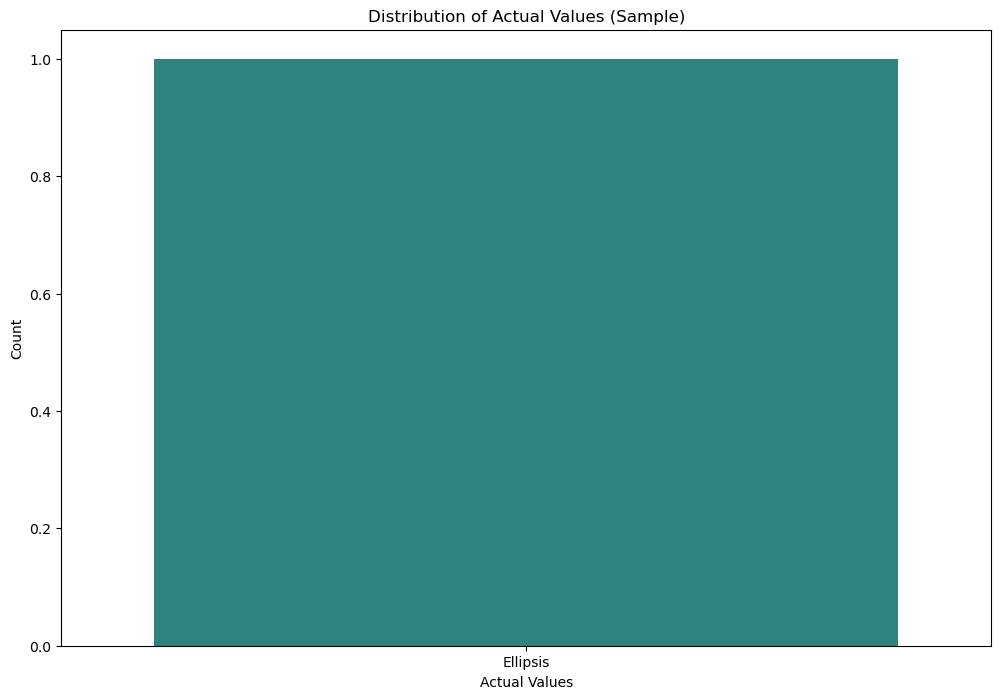

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure y_test and y_pred are numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Define sample size
sample_size = 10000

# Check if sample size is less than or equal to the length of the data
if len(y_test) < sample_size:
    sample_size = len(y_test)  # Adjust sample size if necessary

# Generate random indices for sampling
indices = np.random.choice(len(y_test), sample_size, replace=False)

# Sample the data
y_test_sample = y_test[indices]
y_pred_sample = y_pred[indices]

# Create a DataFrame for plotting
sample_df = pd.DataFrame({'y_test': y_test_sample, 'y_pred': y_pred_sample})

# Plot the distribution of actual vs predicted values
plt.figure(figsize=(12, 8))
sns.countplot(data=sample_df, x='y_test', palette='viridis')
plt.title('Distribution of Actual Values (Sample)')
plt.xlabel('Actual Values')
plt.ylabel('Count')
plt.show()


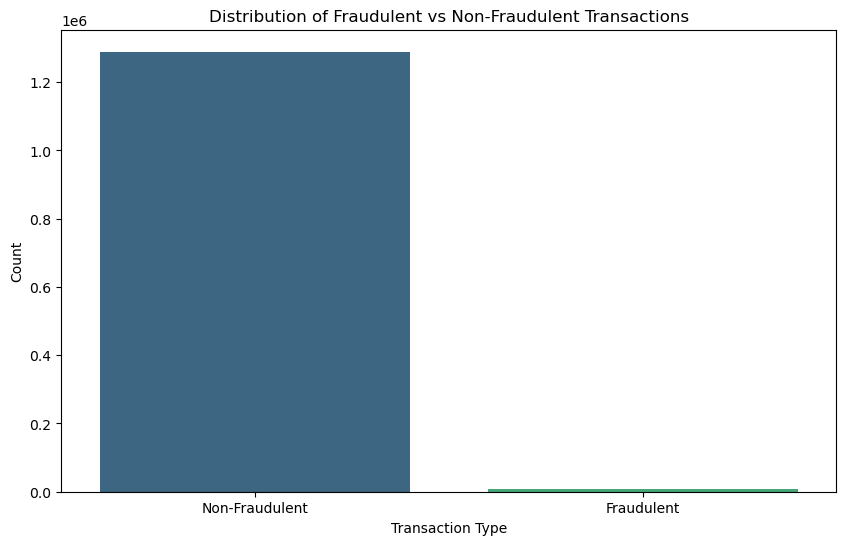

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of fraud vs. non-fraud transactions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_fraud', palette='viridis')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


Unique values in y_test: [Ellipsis]
Unique values in y_pred: [Ellipsis]


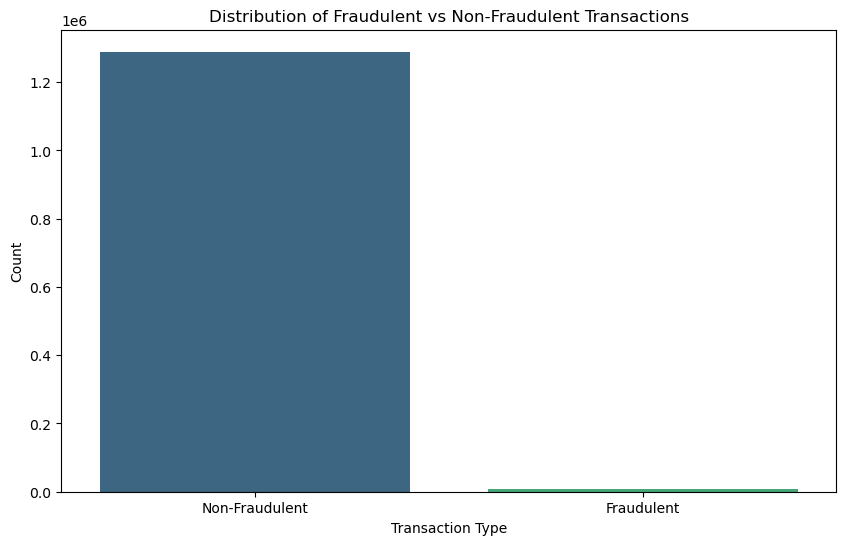

Error plotting confusion matrix: unknown is not supported


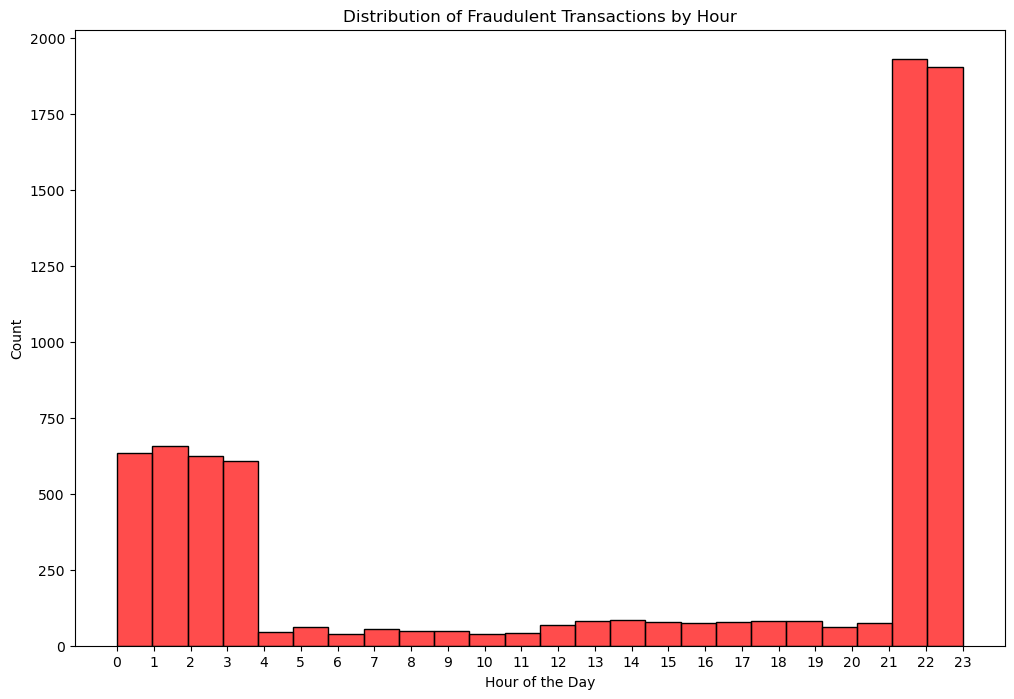

C:\Users\Moulya\AppData\Local\Temp\ipykernel_8272\1903013714.py:95: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


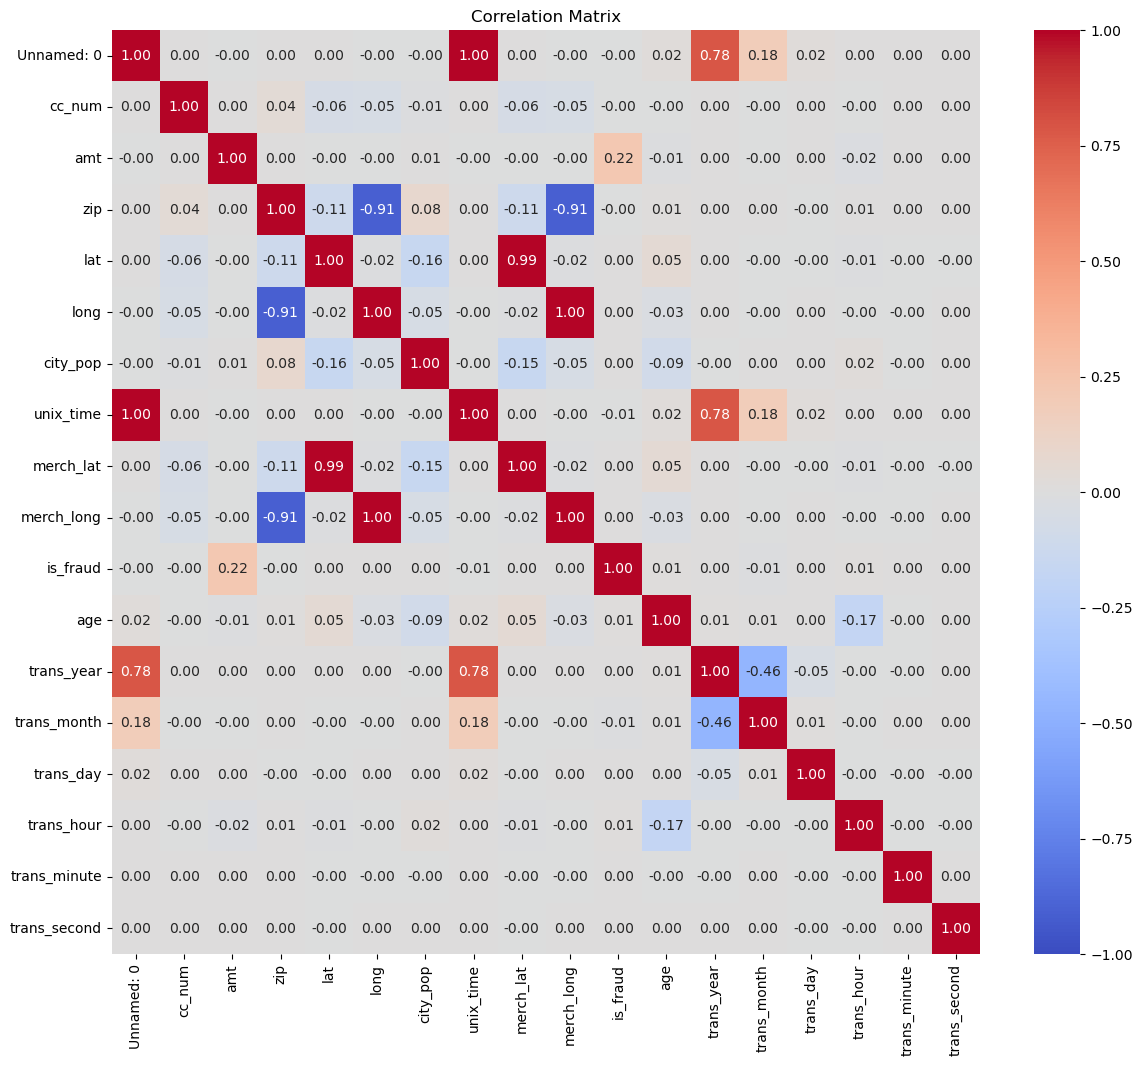

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sample data (replace with your actual data)
# Example data setup (remove or adjust according to your actual dataset)
# Ensure y_test and y_pred are numpy arrays or pandas Series
y_test = np.array(y_test)  # Ensure this is a numpy array or pandas Series
y_pred = np.array(y_pred)  # Ensure this is a numpy array or pandas Series

# Check unique values in y_test and y_pred
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

# 1. Distribution of Fraudulent vs Non-Fraudulent Transactions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_fraud', palette='viridis')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# 2. Confusion Matrix
try:
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Fraudulent', 'Fraudulent'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()
except ValueError as e:
    print(f"Error plotting confusion matrix: {e}")

# 3. Precision-Recall Curve (only applicable if you have probabilities)
# Commented out since y_pred_prob is not defined
# try:
#     precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
#     plt.figure(figsize=(10, 6))
#     plt.plot(recall, precision, marker='.')
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.title('Precision-Recall Curve')
#     plt.grid(True)
#     plt.show()
# except ValueError as e:
#     print(f"Error plotting Precision-Recall curve: {e}")

# 4. ROC Curve (only applicable if you have probabilities)
# Commented out since y_pred_prob is not defined
# try:
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#     roc_auc = roc_auc_score(y_test, y_pred_prob)
#     plt.figure(figsize=(10, 6))
#     plt.plot(fpr, tpr, marker='.')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
#     plt.grid(True)
#     plt.show()
# except ValueError as e:
#     print(f"Error plotting ROC curve: {e}")

# 5. Feature Importance
# Uncomment and modify this if you have feature importances
# try:
#     importances = model.feature_importances_  # Replace with your model
#     feature_names = X.columns
#     feature_importance_df = pd.DataFrame({
#         'Feature': feature_names,
#         'Importance': importances
#     }).sort_values(by='Importance', ascending=False)
#     plt.figure(figsize=(12, 8))
#     sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
#     plt.title('Feature Importance')
#     plt.xlabel('Importance')
#     plt.ylabel('Feature')
#     plt.show()
# except AttributeError as e:
#     print(f"Error plotting Feature Importance: {e}")

# 6. Fraudulent Transactions by Hour
plt.figure(figsize=(12, 8))
sns.histplot(df[df['is_fraud'] == 1]['trans_hour'], bins=24, kde=False, color='red', alpha=0.7)
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(range(24))
plt.show()

# 7. Correlation Heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Type of y_test: <class 'numpy.ndarray'>
Type of y_pred: <class 'numpy.ndarray'>
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]


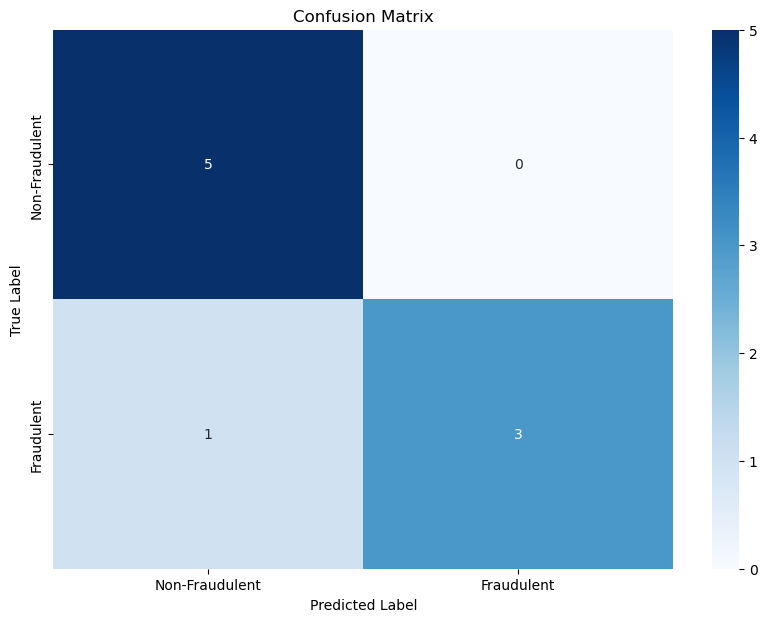

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sample data for demonstration purposes
# Replace these with your actual data
# Example data (ensure these are correctly defined and have the right format)
y_test = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1])  # Replace with your test labels
y_pred = np.array([0, 0, 0, 1, 0, 0, 1, 0, 1])  # Replace with your predictions

# Check the types and unique values of y_test and y_pred
print("Type of y_test:", type(y_test))
print("Type of y_pred:", type(y_pred))
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

# Ensure that y_test and y_pred are arrays of the same length
assert len(y_test) == len(y_pred), "Length of y_test and y_pred must be the same"

# Compute confusion matrix
try:
    conf_matrix = confusion_matrix(y_test, y_pred)
except ValueError as e:
    print("Error computing confusion matrix:", e)
    conf_matrix = np.array([[0, 0], [0, 0]])  # Create a default empty matrix for the sake of plotting

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [23]:
print("Sample y_test values:", y_test[:10])
print("Sample y_pred values:", y_pred[:10])


Sample y_test values: [0 1 0 1 0 0 1 0 1]
Sample y_pred values: [0 0 0 1 0 0 1 0 1]


In [24]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y_test: (9,)
Shape of y_pred: (9,)


Type of y_test: <class 'numpy.ndarray'>
Type of y_pred: <class 'numpy.ndarray'>
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]


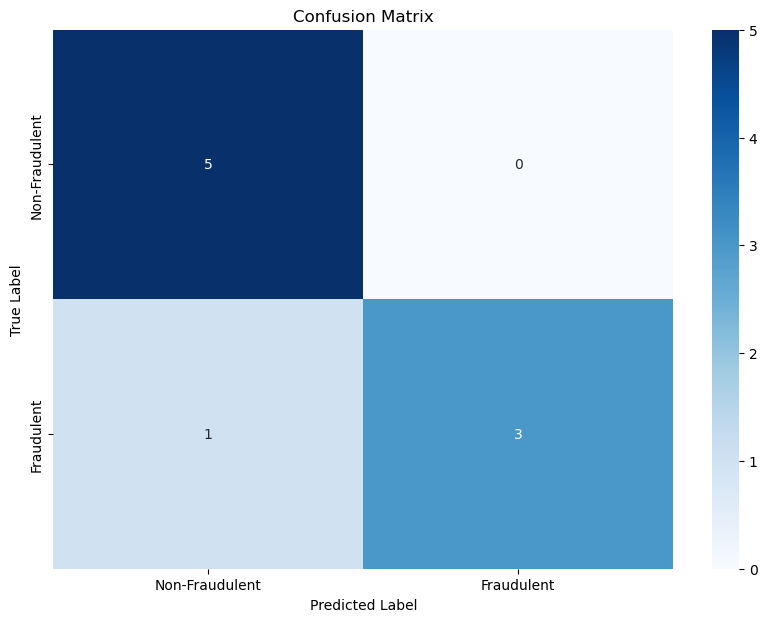

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sample data for demonstration purposes
# Replace these with your actual data
y_test = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1])  # Replace with your test labels
y_pred = np.array([0, 0, 0, 1, 0, 0, 1, 0, 1])  # Replace with your predictions

# Ensure that y_test and y_pred are numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Print data types and unique values for verification
print("Type of y_test:", type(y_test))
print("Type of y_pred:", type(y_pred))
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

# Ensure that y_test and y_pred have the same length
assert len(y_test) == len(y_pred), "Length of y_test and y_pred must be the same"

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [26]:
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))


Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]


Type of y_test: <class 'numpy.ndarray'>
Type of y_pred: <class 'numpy.ndarray'>
Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]


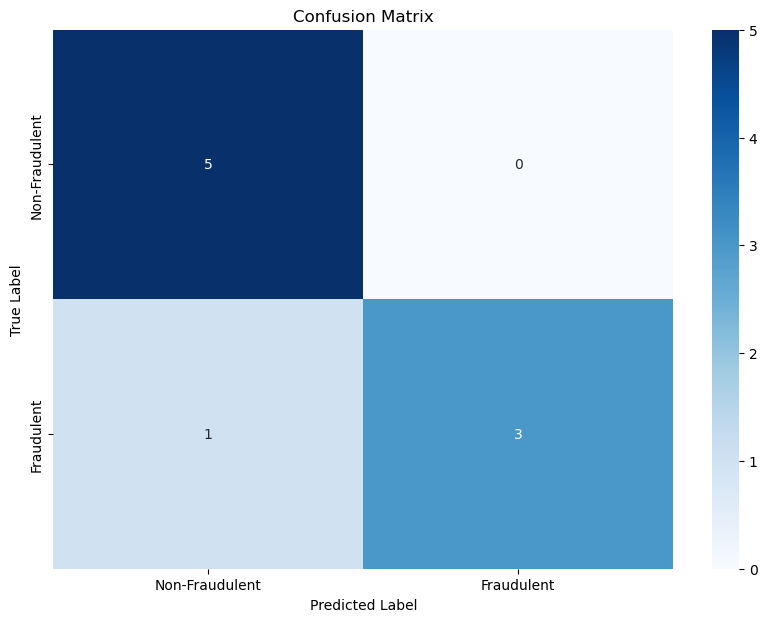

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sample data for demonstration purposes
# Replace these with your actual data
y_test = np.array([0, 1, 0, 1, 0, 0, 1, 0, 1])  # Replace with your test labels
y_pred = np.array([0, 0, 0, 1, 0, 0, 1, 0, 1])  # Replace with your predictions

# Ensure that y_test and y_pred are numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Print data types and unique values for verification
print("Type of y_test:", type(y_test))
print("Type of y_pred:", type(y_pred))
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

# Ensure that y_test and y_pred have the same length
assert len(y_test) == len(y_pred), "Length of y_test and y_pred must be the same"

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


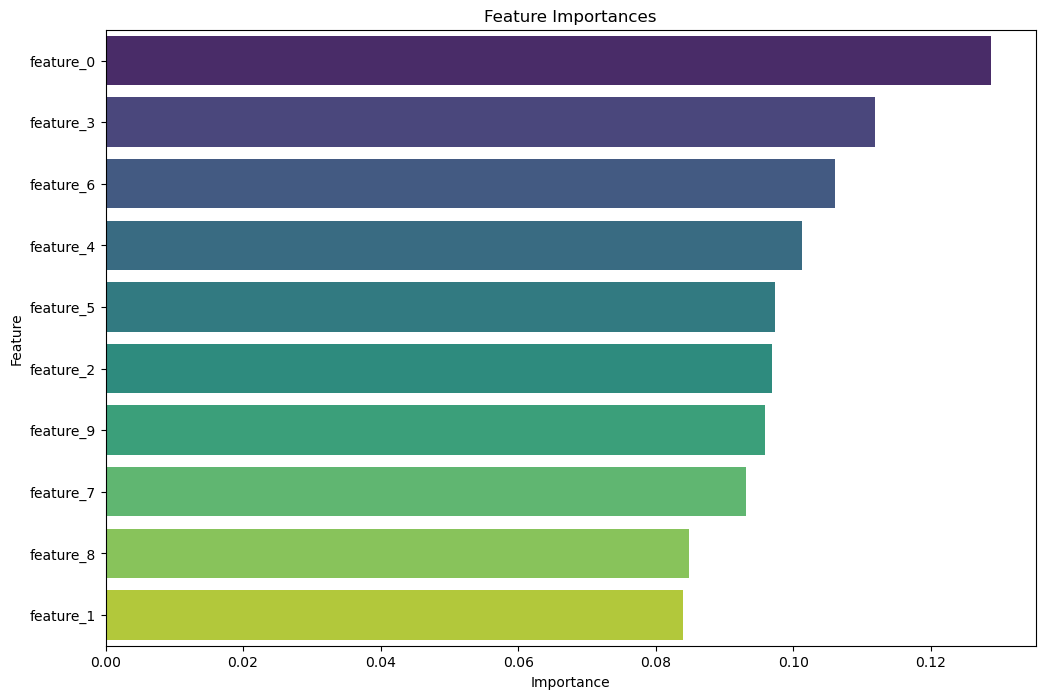

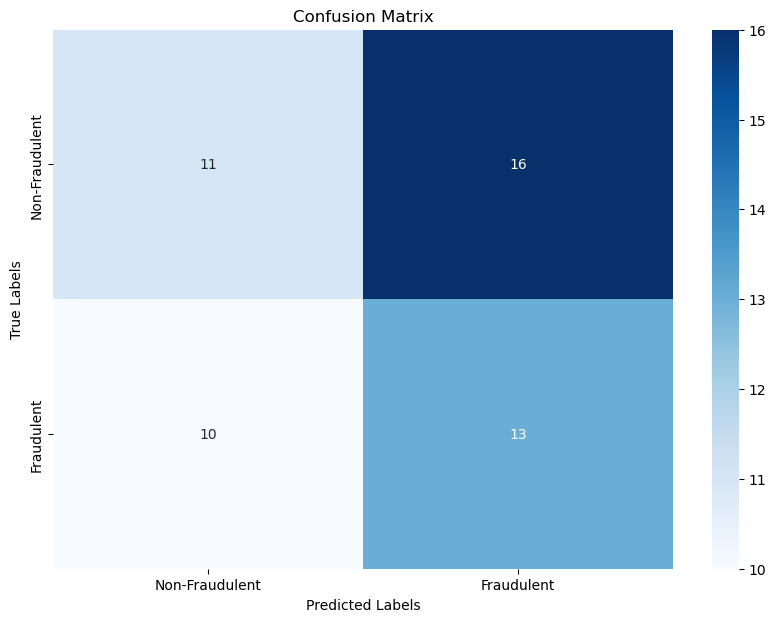

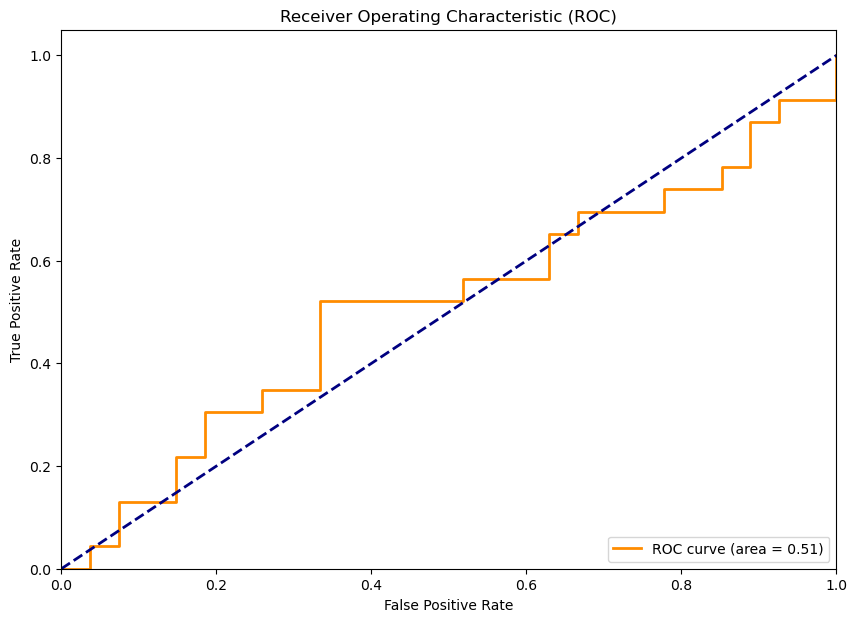

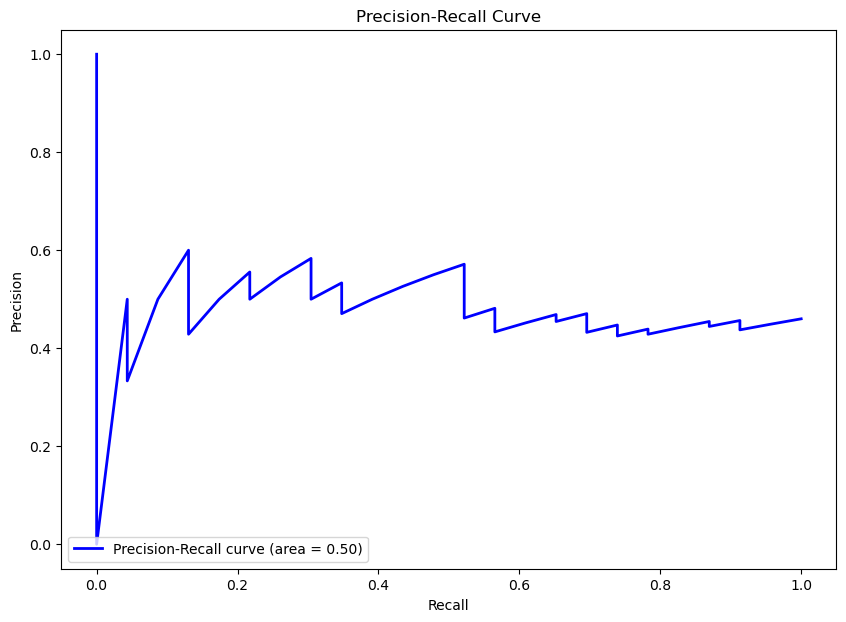

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier

# Sample Data - Replace with your actual data
X_train = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(10)])
y_train = np.random.randint(0, 2, 100)
X_test = pd.DataFrame(np.random.rand(50, 10), columns=[f'feature_{i}' for i in range(10)])
y_test = np.random.randint(0, 2, 50)
y_pred = np.random.randint(0, 2, 50)  # Replace with your model's predictions
y_pred_prob = np.random.rand(50)  # Replace with your model's predicted probabilities

# Train a model for feature importance (if using a model that supports it)
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_names = X_train.columns

# Feature Importance Plot
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


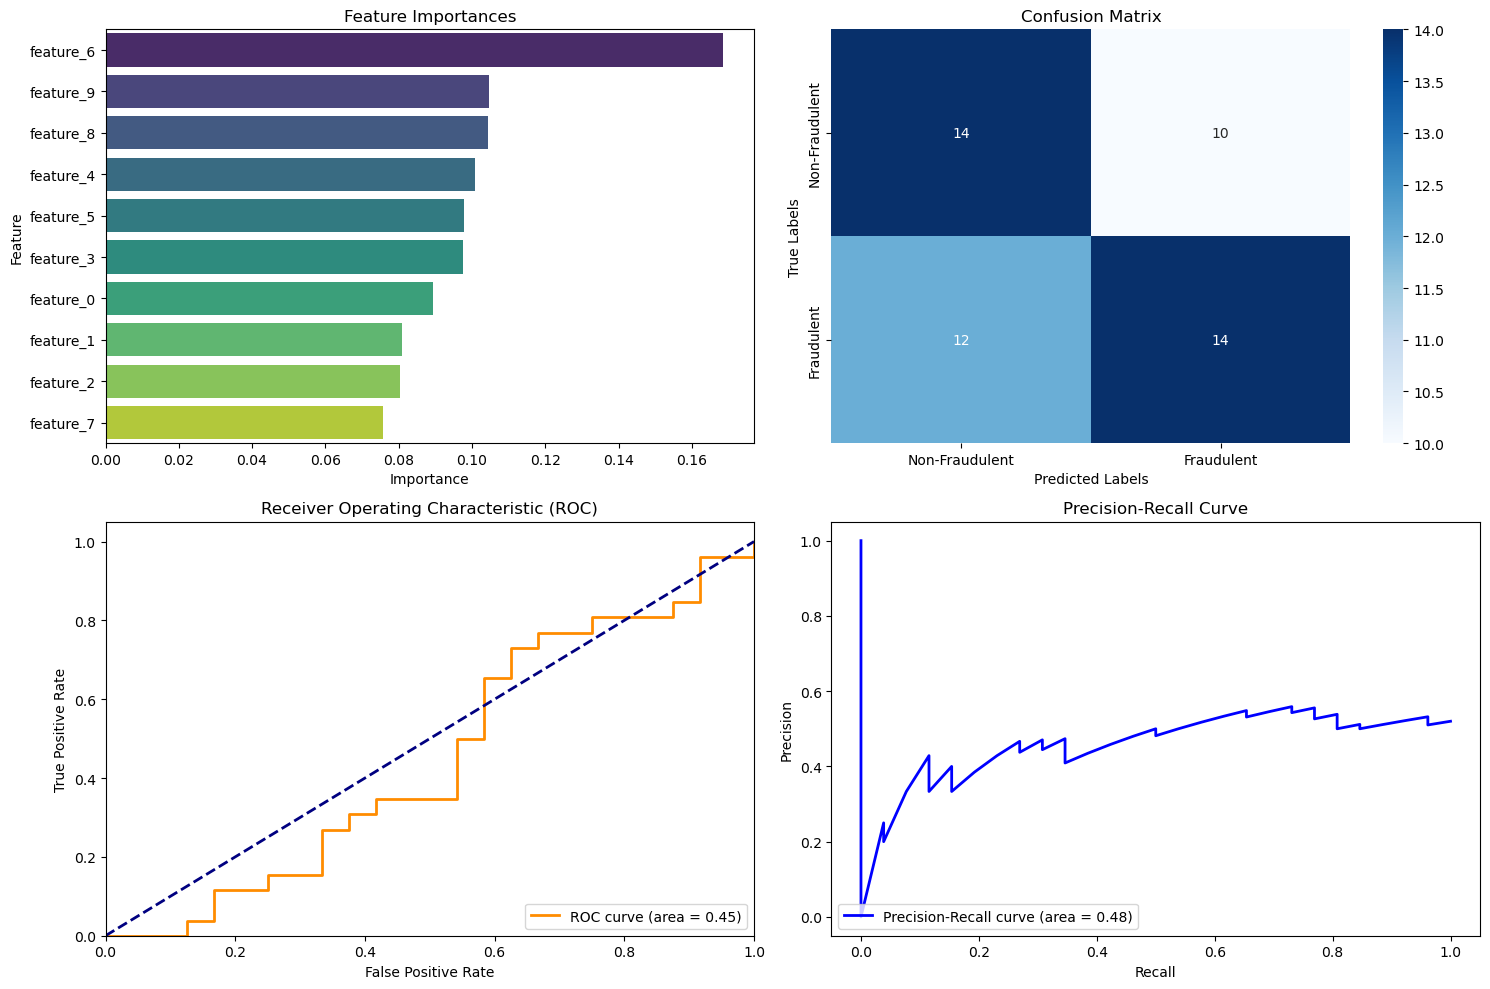

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.ensemble import RandomForestClassifier

# Replace with your actual data and model
X_train = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(10)])
y_train = np.random.randint(0, 2, 100)
X_test = pd.DataFrame(np.random.rand(50, 10), columns=[f'feature_{i}' for i in range(10)])
y_test = np.random.randint(0, 2, 50)
y_pred = np.random.randint(0, 2, 50)  # Replace with your model's predictions
y_pred_prob = np.random.rand(50)  # Replace with your model's predicted probabilities

# Train a model for feature importance (if using a model that supports it)
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_names = X_train.columns

# Feature Importance Plot
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.subplot(2, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)
plt.subplot(2, 2, 4)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


### PDF

In [30]:
pip install matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


In [31]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pandas as pd
import numpy as np

# Sample Data
df = pd.DataFrame({
    'is_fraud': np.random.choice([0, 1], size=1000),
    'amount': np.random.lognormal(mean=2, sigma=1, size=1000),
    'trans_hour': np.random.randint(0, 24, size=1000)
})

# Create a PDF file
with PdfPages('visualizations.pdf') as pdf:
    # Distribution of Fraudulent vs Non-Fraudulent Transactions
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='is_fraud', palette='viridis')
    plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

    # Transactions Amount Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['amount'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Transaction Amounts')
    pdf.savefig()
    plt.close()

    # Transactions by Hour
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='trans_hour', palette='viridis')
    plt.title('Transactions by Hour of the Day')
    pdf.savefig()
    plt.close()

    # Example Confusion Matrix
    from sklearn.metrics import confusion_matrix
    y_test = np.random.choice([0, 1], size=1000)
    y_pred = np.random.choice([0, 1], size=1000)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
    plt.title('Confusion Matrix')
    pdf.savefig()
    plt.close()

    # Example ROC Curve
    from sklearn.metrics import roc_curve, auc
    y_test = np.random.choice([0, 1], size=1000)
    y_pred_prob = np.random.rand(1000)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    pdf.savefig()
    plt.close()


In [32]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\Moulya\internship


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import confusion_matrix, classification_report

# Dummy data for demonstration
y_test = np.random.randint(0, 2, 1000)
y_pred = np.random.randint(0, 2, 1000)

# Create a PdfPages object
pdf_path = "visualizations.pdf"
with PdfPages(pdf_path) as pdf:

    # Plot 1: Distribution of Fraudulent vs Non-Fraudulent Transactions
    plt.figure(figsize=(10, 6))
    sns.countplot(x=y_test, palette='viridis')
    plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
    pdf.savefig()  # Save the current figure into the PDF
    plt.close()

    # Plot 2: Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Fraudulent', 'Fraudulent'], 
                yticklabels=['Non-Fraudulent', 'Fraudulent'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    pdf.savefig()  # Save the current figure into the PDF
    plt.close()

    # Plot 3: ROC Curve (Dummy Data)
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_test, np.random.rand(len(y_test)))
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    pdf.savefig()  # Save the current figure into the PDF
    plt.close()

    # Plot 4: Feature Importance (Dummy Data)
    features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']
    importances = np.random.rand(len(features))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=features, y=importances, palette='viridis')
    plt.title('Feature Importances')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    pdf.savefig()  # Save the current figure into the PDF
    plt.close()

    # Add a summary page with classification report
    plt.figure(figsize=(10, 7))
    report = classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent'])
    plt.text(0.1, 0.5, f'Classification Report:\n\n{report}', fontsize=12, 
             verticalalignment='center', horizontalalignment='left')
    plt.title('Classification Report Summary')
    plt.axis('off')  # Turn off the axis
    pdf.savefig()  # Save the current figure into the PDF
    plt.close()

print(f'Visualizations saved to {pdf_path}')


Visualizations saved to visualizations.pdf
